# Random but not allow only-one-corner-touch

Room at (6, 35) with width 6 and depth 4
Room at (9, 31) with width 4 and depth 4
Room at (7, 26) with width 2 and depth 8
Room at (1, 26) with width 6 and depth 4
Room at (0, 33) with width 6 and depth 6
Room at (8, 20) with width 3 and depth 6
Room at (1, 21) with width 6 and depth 5
Room at (11, 27) with width 5 and depth 4


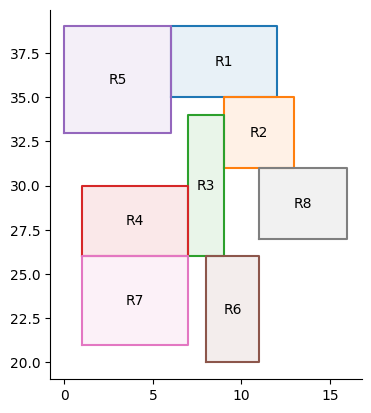

In [11]:
import random
import matplotlib.pyplot as plt
from shapely.geometry import Polygon

class Rectangle:
    def __init__(self, width, depth, x, y):
        self.width = width
        self.depth = depth
        self.x = x
        self.y = y

    def get_coords(self):
        return [
            (self.x, self.y),
            (self.x + self.width, self.y),
            (self.x + self.width, self.y + self.depth),
            (self.x, self.y + self.depth),
        ]


def is_valid_placement(rect, grid):
    # check if the rectangle attaches to the cluster, not overlap/separate
    if grid is None:
        return True
    
    if grid.touches(Polygon(rect.get_coords())):
        touch_part = grid.intersection(Polygon(rect.get_coords()))
        if touch_part.geom_type in ["LineString", "MultiLineString"]:
            return True
        else:
            return False
    else:
        return False


def generate_house_cluster(
    min_width, max_width, min_depth, max_depth, max_cluster_width, max_cluster_depth
):
    cluster = None  # Keep track of occupied cluster cells
    placed_rectangles = []

    while len(placed_rectangles) < 8:
        width = random.randint(min_width, max_width)
        depth = random.randint(min_depth, max_depth)

        x = random.randint(0, max_cluster_width - width)
        y = random.randint(0, max_cluster_depth - depth)

        new_rect = Rectangle(width, depth, x, y)

        if is_valid_placement(new_rect, cluster):
            placed_rectangles.append(new_rect)
            if cluster is None:
                cluster = Polygon(new_rect.get_coords())
            else:
                cluster = cluster.union(Polygon(new_rect.get_coords()))
        else:
            continue  # Retry if placement is not valid

    return placed_rectangles


# Example usage
min_width = 1
max_width = 6
min_depth = 2
max_depth = 8
max_cluster_width = 20
max_cluster_depth = 40

house = generate_house_cluster(
    min_width, max_width, min_depth, max_depth, max_cluster_width, max_cluster_depth
)
for rect in house:
    print(
        f"Room at ({rect.x}, {rect.y}) with width {rect.width} and depth {rect.depth}"
    )


# draw the house cluster
def draw_house_cluster(house):
    for i, rect in enumerate(house):
        x, y = rect.x, rect.y
        width, depth = rect.width, rect.depth
        plt.fill([x, x, x + width, x + width], [y, y + depth, y + depth, y], alpha=0.1)
        plt.plot([x, x, x + width, x + width, x], [y, y + depth, y + depth, y, y])
        plt.text(x + width / 2, y + depth / 2, f"R{i+1}", ha="center", va="center")
        
    plt.gca().set_aspect("equal", adjustable="box")
    plt.gca().spines["right"].set_visible(False)
    plt.gca().spines["top"].set_visible(False)

    plt.show()


draw_house_cluster(house)

# Random allowing only-one-corner-touch
worse than the 1st one

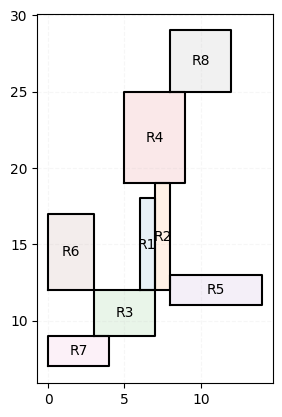

In [12]:
import random
import matplotlib.pyplot as plt
from shapely.geometry import Polygon

class Rectangle:
    def __init__(self, width, depth, x, y):
        self.width = width
        self.depth = depth
        self.x = x
        self.y = y

    def get_coords(self):
        return [
            (self.x, self.y),
            (self.x + self.width, self.y),
            (self.x + self.width, self.y + self.depth),
            (self.x, self.y + self.depth),
        ]


def is_valid_placement(rect, grid):
    if grid is None:
        return True

    new_polygon = Polygon(rect.get_coords())
    return grid.touches(new_polygon)


def generate_house_cluster(min_width, max_width, min_depth, max_depth, max_cluster_width, max_cluster_depth):
    cluster = None
    placed_rectangles = []

    while len(placed_rectangles) < 8:
        width = random.randint(min_width, max_width)
        depth = random.randint(min_depth, max_depth)

        x = random.randint(0, max_cluster_width - width)
        y = random.randint(0, max_cluster_depth - depth)

        new_rect = Rectangle(width, depth, x, y)

        if is_valid_placement(new_rect, cluster):
            placed_rectangles.append(new_rect)
            if cluster is None:
                cluster = Polygon(new_rect.get_coords())
            else:
                cluster = cluster.union(Polygon(new_rect.get_coords()))
        else:
            continue

    return placed_rectangles


def draw_house_cluster(house):
    for i, rect in enumerate(house):
        x, y = rect.x, rect.y
        width, depth = rect.width, rect.depth
        plt.fill([x, x, x + width, x + width], [y, y + depth, y + depth, y], alpha=0.1)
        plt.plot([x, x, x + width, x + width, x], [y, y + depth, y + depth, y, y], 'k-')
        plt.text(x + width / 2, y + depth / 2, f"R{i+1}", ha="center", va="center")

    plt.gca().set_aspect("equal", adjustable="box")
    plt.grid(True, linestyle='--', alpha=0.1)
    plt.show()

house = generate_house_cluster(
    min_width, max_width, min_depth, max_depth, max_cluster_width, max_cluster_depth
)
draw_house_cluster(house)

# With more constraints for each room
Looks ok

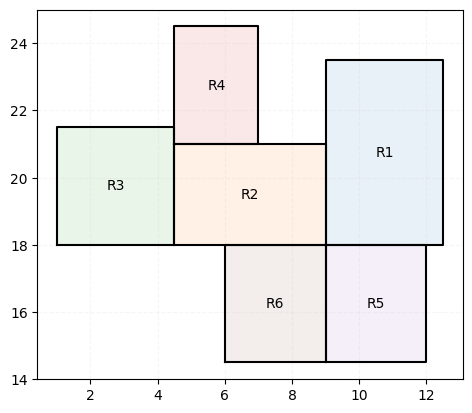

In [13]:

def is_valid_placement(rect, grid):
    # check if the rectangle attaches to the cluster, not overlap/separate
    if grid is None:
        return True
    
    if grid.touches(Polygon(rect.get_coords())):
        touch_part = grid.intersection(Polygon(rect.get_coords()))
        if touch_part.geom_type in ["LineString", "MultiLineString"]:
            return True
        else:
            return False
    else:
        return False

def generate_house_cluster_with_constraints(
    room_types, max_cluster_width, max_cluster_depth
):
    """
    Generate a cluster of rectangles resembling a house layout.
    Args:
        room_types: List of room types with dimensions (type, min_width, max_width, min_depth, max_depth)
        max_cluster_width: Maximum width of the cluster.
        max_cluster_depth: Maximum depth of the cluster.
    Returns:
        A list of rectangles (rooms).
    """
    cluster = None  # Keep track of occupied cluster cells
    placed_rectangles = []
    
    for room in room_types:
        room_type, min_width, max_width, min_depth, max_depth = room
        placed = False

        while not placed:
            # generate random width and depth for the room
            # float, with 0.5 precision
            width = round(random.uniform(min_width, max_width)*2)/2
            depth = round(random.uniform(min_depth, max_depth)*2)/2

            if not placed_rectangles:
                # Place the first room at the center
                x = max_cluster_width // 2 - width // 2
                y = max_cluster_depth // 2 - depth // 2
            else:
                # Add new room adjacent to an existing room
                base_room = random.choice(placed_rectangles)
                direction = random.choice(["left", "right", "up", "down"])
                if direction == "left":
                    x = base_room.x - width
                    y = base_room.y
                elif direction == "right":
                    x = base_room.x + base_room.width
                    y = base_room.y
                elif direction == "up":
                    x = base_room.x
                    y = base_room.y + base_room.depth
                elif direction == "down":
                    x = base_room.x
                    y = base_room.y - depth

            new_rect = Rectangle(width, depth, x, y)

            if is_valid_placement(new_rect, cluster):
                placed_rectangles.append(new_rect)
                if cluster is None:
                    cluster = Polygon(new_rect.get_coords())
                else:
                    cluster = cluster.union(Polygon(new_rect.get_coords()))
                placed = True

    return placed_rectangles


# Define room types (type, min_width, max_width, min_depth, max_depth)
room_types = [
    ("LR", 3, 6, 3, 6),  # Living Room
    ("MBR", 3, 6, 3, 6),  # Master Bedroom
    ("BR", 3, 4.5, 3, 4.5),  # Bedroom
    # ("BR2", 3, 4.5, 3, 4.5),       #Bedroom2
    ("KIC", 2, 4, 2, 4),  # Kitchen
    ("BA", 2, 4, 2, 5),  # Bathroom
    # ("HW", 1, 1.5, 2, 10),  # Hallway
    # ("BAL", 1, 2, 2, 8),  # Balcony
    ("DR", 3, 5, 3, 5),  # Dining Room
]

house = generate_house_cluster_with_constraints(room_types, 20, 40)
draw_house_cluster(house)


# More exploration

In [14]:
from shapely.geometry import Polygon
# def is_within_aspect_ratio(cluster):
#     print(cluster.geom_type)
#     width = max([x for x, y in cluster.exterior.coords]) - min([x for x, y in cluster.exterior.coords])
#     depth = max([y for x, y in cluster.exterior.coords]) - min([y for x, y in cluster.exterior.coords])
#     aspect_ratio = width / depth if depth > 0 else 0
#     return 1 <= aspect_ratio <= 2.5

def has_concave_shape(cluster):
    building_polygon = cluster.convex_hull
    return not building_polygon.equals(cluster)

def generate_random_room(min_width, max_width, min_depth, max_depth):
    width = round(random.uniform(min_width, max_width)*2)/2
    depth = round(random.uniform(min_depth, max_depth)*2)/2
    x = round(random.uniform(0, 20 - width)*2)/2
    y = round(random.uniform(0, 40 - depth)*2)/2
    return Rectangle(width, depth, x, y)

def generate_compact_floor_plan(room_types, max_width, max_depth):
    cluster = None
    placed_rectangles = []
    for room_type, min_width, max_width, min_depth, max_depth in room_types:
        placed = False
        while not placed:
            new_room = generate_random_room(min_width, max_width, min_depth, max_depth)
            if is_valid_placement(new_room, cluster):
                tmp_cluster = cluster.union(Polygon(new_room.get_coords())) if cluster else Polygon(new_room.get_coords())

                if not has_concave_shape(tmp_cluster):
                    cluster = tmp_cluster
                    placed_rectangles.append(new_room)
                    placed = True
    
    return placed_rectangles

floor_plan = generate_compact_floor_plan(room_types, 20, 40)
draw_house_cluster(floor_plan)

KeyboardInterrupt: 